In [1]:
import os
import sys
import math
from collections import Counter
import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
path = './Data/Lab10/development_2.txt'
with open(path,"r",encoding="utf-8") as f:
    a = f.readlines()

In [3]:
text = [i[:-1] for i in a if len(i) > 50]
text[1]

'醫師：就照舊這樣子。阿這一定要跟你講一下。家屬：沒關係啊。醫師：阿最近好嗎？民眾：都正常。醫師：都正常。家屬：他血壓都108。醫師：108喔，會不會太低？家屬：應該還好吧。醫師：會不會頭暈？家屬：會不會頭暈？民眾：有些藥我就不吃啦，啊我……醫師：喔～民眾：吃這種感覺比較不頭暈這樣。醫師：比較不頭暈。民眾：不然整天都……這種的，這樣的。醫師：喔，這個藥，我查看看，我們醫院應該沒有……民眾：那是那裏才有還是……醫師：會不會太低？……這個。他這個是營養食品欸，不是藥。家屬：營養食品，那營養食品，那營養食品。醫師：嘿一些維他命啦、一些……家屬：維他命C甚麼都有。醫師：嘿維他命C綜合的。家屬：綜合的。醫師：嘿這應該可以吃啦。家屬、B：好啊。醫師：阿血壓都不高我們是不是藥可以減輕一點？家屬：嘿對阿。醫師：阿現在血糖……血壓的藥吃三種。家屬：喔那可以減了吧，太多了哈。醫師：減一顆。把其中一顆藥減一顆。家屬：對裡面有三顆。醫師：還好，嗯。阿那個……我們把其中一個比較……比較重要的我們先留著齁。民眾：好好。醫師：阿這次五月中有抽血。家屬：可以下次回診再排嗎？醫師：痾我看一下……下次不用……這次應該……他狀況都還穩定啦。家屬：嘿不用再排了。醫師：嘿下次再寫。家屬：嘿嘿。醫師：再再抽血就好了齁。家屬：差不多下次再來就好……醫師：嘿一起來齁，好。啊我藥先……血壓的藥先減掉。家屬：嗯嗯嗯。家屬：那跟喝酒有沒有關係啊？醫師：有有有關係阿，有差。家屬：對阿差這麼多。從來就沒這麼低過。醫師：對阿。家屬：哈。醫師：酒精會讓血壓高……家屬：對。民眾：差不多三個月沒喝了。醫師：哇。哈哈。阿這些指數都降下來了。家屬：嗯。醫師：血糖甚麼都正……降下來了。家屬：每個做一切……醫師：阿如果菸咧，菸改的掉嘛？家屬：沒有。民眾：慢慢來哈。醫師：慢慢來齁。看下次來是不是能夠改掉齁。好，那我們坐後面我們等一下，我們先外面等……'

In [41]:
for idx,i in enumerate(text):
    text[idx] = text[idx].replace("個管師", "醫師").replace("女醫師", "醫師").replace("護理師", "醫師").replace("家屬", "民眾")
text[1]

'醫師：就照舊這樣子。阿這一定要跟你講一下。民眾：沒關係啊。醫師：阿最近好嗎？民眾：都正常。醫師：都正常。民眾：他血壓都108。醫師：108喔，會不會太低？民眾：應該還好吧。醫師：會不會頭暈？民眾：會不會頭暈？民眾：有些藥我就不吃啦，啊我……醫師：喔～民眾：吃這種感覺比較不頭暈這樣。醫師：比較不頭暈。民眾：不然整天都……這種的，這樣的。醫師：喔，這個藥，我查看看，我們醫院應該沒有……民眾：那是那裏才有還是……醫師：會不會太低？……這個。他這個是營養食品欸，不是藥。民眾：營養食品，那營養食品，那營養食品。醫師：嘿一些維他命啦、一些……民眾：維他命C甚麼都有。醫師：嘿維他命C綜合的。民眾：綜合的。醫師：嘿這應該可以吃啦。民眾、B：好啊。醫師：阿血壓都不高我們是不是藥可以減輕一點？民眾：嘿對阿。醫師：阿現在血糖……血壓的藥吃三種。民眾：喔那可以減了吧，太多了哈。醫師：減一顆。把其中一顆藥減一顆。民眾：對裡面有三顆。醫師：還好，嗯。阿那個……我們把其中一個比較……比較重要的我們先留著齁。民眾：好好。醫師：阿這次五月中有抽血。民眾：可以下次回診再排嗎？醫師：痾我看一下……下次不用……這次應該……他狀況都還穩定啦。民眾：嘿不用再排了。醫師：嘿下次再寫。民眾：嘿嘿。醫師：再再抽血就好了齁。民眾：差不多下次再來就好……醫師：嘿一起來齁，好。啊我藥先……血壓的藥先減掉。民眾：嗯嗯嗯。民眾：那跟喝酒有沒有關係啊？醫師：有有有關係阿，有差。民眾：對阿差這麼多。從來就沒這麼低過。醫師：對阿。民眾：哈。醫師：酒精會讓血壓高……民眾：對。民眾：差不多三個月沒喝了。醫師：哇。哈哈。阿這些指數都降下來了。民眾：嗯。醫師：血糖甚麼都正……降下來了。民眾：每個做一切……醫師：阿如果菸咧，菸改的掉嘛？民眾：沒有。民眾：慢慢來哈。醫師：慢慢來齁。看下次來是不是能夠改掉齁。好，那我們坐後面我們等一下，我們先外面等……'

In [42]:
sep_text = []
token1 = '醫師：'
for i in text:
  _ = []
  for s in i.split(token1):
    if len(s) != '':
      _.append(s)
  sep_text.extend(_)
sep_text

['',
 '這個要電腦看才有辦法，這是嚴重或一般的。民眾：這是沒關係啦。',
 '沒關係齁。民眾：他一定要有說，這樣才有辦法。',
 '是是多謝你。民眾：沒關係。',
 '這樣，你過去是有得糖尿病嘛？民眾：有。',
 '啊出院後還有再發燒或是？民眾：欸出院是沒有啦。',
 '沒有啦齁。民眾：啊，有感覺人齁。',
 '嘿。民眾：比較沒沒有像以前那樣。',
 '嘿。民眾：全部都沒有力啦。',
 '齁。民眾：啊現在比較有力了啦，不知道是那一天，說我貧血齁。',
 '稍微貧血。民眾：啊幫我輸血進來。',
 '他有幫你輸血喔？民眾：感覺這樣比較。民眾：他有給他輸25的。民眾：是感覺精神啦。',
 '李醫生。民眾：他就說他貧血。',
 '有幫你輸一袋了齁。民眾：嘿，輸一袋。',
 '輸一袋。民眾：那個25。',
 '25。民眾：一包小包的。',
 '啊你排尿有比較好嗎？排尿的那個？民眾：哦他。民眾：變成說我晚上齁，我都要吃睡眠的。',
 '要吃睡眠的。民眾：啊我都差不多11點吃睡到差不多4點。',
 '是。民眾：開始起來一小時起來一次到天亮，都沒有停喔。',
 '頻尿欸喔。民眾：沒有。民眾：沒有，廁所。',
 '廁所。民眾：啊如果。民眾：他的腳齁，他的腳。',
 '水腫齁。民眾：在水腫欸，他那個藥吃太多，你幫他看一下。民眾：以前是沒有啦。',
 '以前是沒有啦。民眾：都沒有。',
 '好。民眾：啊現在有水腫。',
 '現在有水腫齁，好。民眾：啊我嚇一跳，我就沒吃睡眠的。',
 '沒吃睡眠的，好那我幫你聽一下，來。民眾：睡到11點多就都沒有睡了啊。',
 '最近沒感冒的現象啦齁。民眾：這兩天都沒有。',
 '啊有發燒嗎？民眾：欸，有時候會稍微冷冷的，但是摸起來是沒有算發燒啦。',
 '沒有算發燒。民眾：主要是肚子脹氣，現在比較沒有肚子脹氣了齁？民眾：我都吃得飽。民眾：不是吃得飽。民眾：有啦，比較沒有肚子脹氣，比較消了。',
 '比較消了喔，我們來按一下肚子一下，有在吃糖尿病的藥嗎？民眾：有。民眾：有。民眾：他就多他很會脹氣，非常會脹氣，晚上都會吐。',
 '肚子會痛嗎？民眾：他那天說。民眾：壓下去會痛痛的。',
 '是左邊還是右邊。民眾：右邊這裡。',
 '右邊這裡。民眾：這種痛的感覺是，像硬壓下去在痛。',
 '硬壓下去在痛。民眾：對對對。',
 '啊走路啦，平常時候不會痛啦

In [43]:
pair_sentence = []
for sent in sep_text[1:]:
  _ = []
  if '民眾：' in sent:
    s = sent.split('民眾：')
    _.extend([s[0]])
    _.extend([s[1]]) 
  if len(_) > 0:
    pair_sentence.append(_)
pair_sentence

[['這個要電腦看才有辦法，這是嚴重或一般的。', '這是沒關係啦。'],
 ['沒關係齁。', '他一定要有說，這樣才有辦法。'],
 ['是是多謝你。', '沒關係。'],
 ['這樣，你過去是有得糖尿病嘛？', '有。'],
 ['啊出院後還有再發燒或是？', '欸出院是沒有啦。'],
 ['沒有啦齁。', '啊，有感覺人齁。'],
 ['嘿。', '比較沒沒有像以前那樣。'],
 ['嘿。', '全部都沒有力啦。'],
 ['齁。', '啊現在比較有力了啦，不知道是那一天，說我貧血齁。'],
 ['稍微貧血。', '啊幫我輸血進來。'],
 ['他有幫你輸血喔？', '感覺這樣比較。'],
 ['李醫生。', '他就說他貧血。'],
 ['有幫你輸一袋了齁。', '嘿，輸一袋。'],
 ['輸一袋。', '那個25。'],
 ['25。', '一包小包的。'],
 ['啊你排尿有比較好嗎？排尿的那個？', '哦他。'],
 ['要吃睡眠的。', '啊我都差不多11點吃睡到差不多4點。'],
 ['是。', '開始起來一小時起來一次到天亮，都沒有停喔。'],
 ['頻尿欸喔。', '沒有。'],
 ['廁所。', '啊如果。'],
 ['水腫齁。', '在水腫欸，他那個藥吃太多，你幫他看一下。'],
 ['以前是沒有啦。', '都沒有。'],
 ['好。', '啊現在有水腫。'],
 ['現在有水腫齁，好。', '啊我嚇一跳，我就沒吃睡眠的。'],
 ['沒吃睡眠的，好那我幫你聽一下，來。', '睡到11點多就都沒有睡了啊。'],
 ['最近沒感冒的現象啦齁。', '這兩天都沒有。'],
 ['啊有發燒嗎？', '欸，有時候會稍微冷冷的，但是摸起來是沒有算發燒啦。'],
 ['沒有算發燒。', '主要是肚子脹氣，現在比較沒有肚子脹氣了齁？'],
 ['比較消了喔，我們來按一下肚子一下，有在吃糖尿病的藥嗎？', '有。'],
 ['肚子會痛嗎？', '他那天說。'],
 ['是左邊還是右邊。', '右邊這裡。'],
 ['右邊這裡。', '這種痛的感覺是，像硬壓下去在痛。'],
 ['硬壓下去在痛。', '對對對。'],
 ['啊走路啦，平常時候不會痛啦齁。', '嗯嗯嗯嗯。'],
 ['啊我聽後背看看齁。', '走路是不會啦。'],
 ['走路是不會啊，脊椎這

In [7]:
doc_sentence = []
fam_sentence = []
for doc,fam in pair_sentence:
  if len(doc) > 1 and len(fam) > 1:
    doc_sentence.append(doc)
    fam_sentence.append(fam)
print('length of doc : ',len(doc_sentence))
print('length of fam : ',len(fam_sentence))



length of doc :  4018
length of fam :  4018


In [8]:
sep_char_doc = [[i for i in sent] for sent in doc_sentence]
sep_char_fam = [[i for i in sent] for sent in fam_sentence]

In [9]:
def sos_eos_sent(sentence):
  print(len(sentence))
  for idx in range(len(sentence)):
    sentence[idx] = ['sos'] + sentence[idx] + ['eos']
  return sentence
char_doc_sentences = sos_eos_sent(sep_char_doc)
char_fam_sentences = sos_eos_sent(sep_char_fam)

4018
4018


In [10]:
idx = 20
print(f'Doc sentence number of {idx} : ',char_doc_sentences[idx])
print(f'Fam sentence number of {idx} : ',char_fam_sentences[idx])

Doc sentence number of 20 :  ['sos', '水', '腫', '齁', '。', 'eos']
Fam sentence number of 20 :  ['sos', '在', '水', '腫', '欸', '，', '他', '那', '個', '藥', '吃', '太', '多', '，', '你', '幫', '他', '看', '一', '下', '。', 'eos']


In [11]:
print(f'最長的句子 : {max(char_doc_sentences, key=len )}')
print(f'最長的句子長度為 : {len(max(char_doc_sentences, key=len ))}')
print(f'最長的句子 : {max(char_fam_sentences, key=len )}')
print(f'最長的句子長度為 : {len(max(char_fam_sentences, key=len ))}')

最長的句子 : ['sos', '聽', '起', '來', '還', '是', '會', '有', '點', '掃', '興', '沒', '有', '錯', '，', '確', '實', '是', '這', '樣', '子', '，', '好', '那', '我', '們', '先', '講', '這', '個', '吃', '法', '。', '原', '則', '上', '是', '講', '說', '理', '論', '上', '要', '在', '性', '行', '為', '之', '前', '就', '要', '有', '藥', '物', '濃', '度', '，', '那', '所', '以', '目', '前', '被', '證', '明', '有', '效', '的', '吃', '法', '有', '兩', '種', '，', '一', '種', '是', '天', '天', '吃', '，', '就', '是', '說', '我', '反', '正', '藥', '都', '是', '同', '一', '顆', '，', '反', '正', '我', '就', '每', '天', '吃', '下', '一', '顆', '藥', '，', '我', '今', '天', '不', '管', '你', '什', '麼', '時', '候', '發', '生', '性', '行', '為', '那', '當', '然', '你', '身', '上', '都', '已', '經', '有', '藥', '物', '濃', '度', '，', '所', '以', '我', '覺', '得', '天', '天', '吃', '是', '我', '覺', '得', '他', '最', '大', '的', '好', '處', '是', '他', '很', '方', '便', '，', '你', '也', '不', '用', '在', '那', '邊', '算', '說', '有', '沒', '有', '遇', '到', '人', '還', '是', '有', '沒', '有', '可', '能', '會', '無', '套', '等', '等', '的', '你', '都', '不', '用', '算', '這', '些', '事', '情', '。',

In [12]:
from collections import Counter
UNK_IDX = 1
PAD_IDX = 0
def build_dict(sentences, max_words=50000):
    word_count = Counter()
    for sentence in sentences:
        for s in sentence:
            word_count[s] += 1
    ls = word_count.most_common(max_words)
    total_words = len(ls) + 2
    word_dict = {w[0]: index+2 for index, w in enumerate(ls)}
    word_dict["UNK"] = UNK_IDX
    word_dict["PAD"] = PAD_IDX
    return word_dict, total_words

doc_w2i, doc_total_words = build_dict(char_doc_sentences)
fam_w2i, fam_total_words = build_dict(char_fam_sentences)

doc_i2w = {i: w for w, i in doc_w2i.items()}
fam_i2w = {i: w for w, i in fam_w2i.items()}

In [13]:
def sentence_convert(q_sent, a_sent, q_dict, a_dict, sort_by_len=True):
    length = len(q_sent)
    out_q_sent = [[q_dict.get(w, 0) for w in sent] for sent in q_sent]
    out_a_sent = [[a_dict.get(w, 0) for w in sent] for sent in a_sent]

    def len_argsort(seq):
        return sorted(range(len(seq)), key=lambda x: len(seq[x]))
       
    if sort_by_len:
        sorted_index = len_argsort(out_q_sent)
        out_q_sent = [out_q_sent[i] for i in sorted_index]
        out_a_sent = [out_a_sent[i] for i in sorted_index]
        
    return out_q_sent, out_a_sent

doc_w2i_sentence, fam_w2i_sentence = sentence_convert(char_doc_sentences, char_fam_sentences, doc_w2i, fam_w2i)

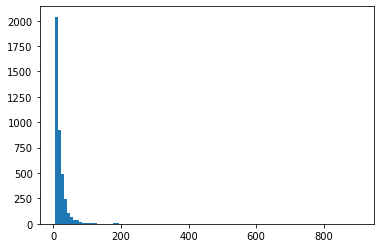

In [14]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in doc_w2i_sentence], bins=100)
plt.show()

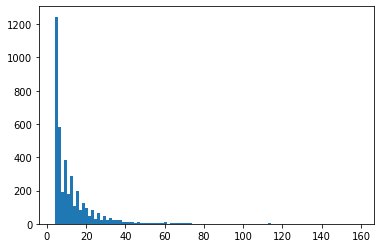

In [15]:
plt.hist([len(s) for s in fam_w2i_sentence], bins=100)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

doc_tr,doc_te,fam_tr,fam_te = train_test_split(doc_w2i_sentence, fam_w2i_sentence,test_size = 0.2, random_state=2020)
print('Train sample for doc : ',len(doc_tr))
print('Dev sample for doc : ',len(doc_te))
print('Train sample for fam : ',len(fam_tr))
print('Dev sample for fam : ',len(fam_te))

Train sample for doc :  3214
Dev sample for doc :  804
Train sample for fam :  3214
Dev sample for fam :  804


### hand-writing

In [17]:
def get_minibatches(n, minibatch_size, shuffle=True):
    idx_list = np.arange(0, n, minibatch_size)
    if shuffle:
        np.random.shuffle(idx_list)
    minibatches = []
    for idx in idx_list:
        minibatches.append(np.arange(idx, min(idx + minibatch_size, n)))
    #print(minibatches)
    return minibatches

def prepare_data(seqs):
    lengths = [len(seq) for seq in seqs]
    n_samples = len(seqs)
    max_len = np.max(lengths)

    x = np.zeros((n_samples, max_len)).astype('int32')
    x_lengths = np.array(lengths).astype("int32")
    for idx, seq in enumerate(seqs):
        x[idx, :lengths[idx]] = seq.copy()
    return x, x_lengths #x_mask

def gen_examples(doc_sent, fam_sent, batch_size):
    minibatches = get_minibatches(len(doc_sent), batch_size)
    all_ex = []
    for minibatch in minibatches:
        mb_doc_sent = [doc_sent[t] for t in minibatch]
        mb_fam_sent = [fam_sent[t] for t in minibatch]
        mb_x, mb_x_len = prepare_data(mb_doc_sent)
        mb_y, mb_y_len = prepare_data(mb_fam_sent)
        all_ex.append((mb_x, mb_x_len, mb_y, mb_y_len))
    return all_ex

batch_size = 4
train_dataloader = gen_examples(doc_tr, fam_tr, batch_size)

dev_dataloader = gen_examples(doc_te, fam_te, batch_size)
print(len(train_dataloader))
print(len(dev_dataloader))

804
201


### model

In [18]:
class PlainEncoder(nn.Module):
    def __init__(self, vocab_size, hidden_size,pad_idx, dropout=0.2):
        super(PlainEncoder, self).__init__()
        self.embed = nn.Embedding(vocab_size, hidden_size,padding_idx=pad_idx)
        self.rnn = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, lengths):
        sorted_len, sorted_idx = lengths.sort(0, descending=True)
        x_sorted = x[sorted_idx.long()] # after sorted from x
        embedded = self.dropout(self.embed(x_sorted))
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, sorted_len.long().cpu().data.numpy(), batch_first=True)
        packed_out, hid = self.rnn(packed_embedded) # default to zero array if not h_0
        _, original_idx = sorted_idx.sort(0, descending=False)
        hid = hid[:, original_idx.long()].contiguous()
        return packed_out, hid

class PlainDecoder(nn.Module):
    def __init__(self, vocab_size, hidden_size,pad_idx, dropout=0.2):
        super(PlainDecoder, self).__init__()
        self.embed = nn.Embedding(vocab_size, hidden_size,padding_idx=pad_idx)
        self.rnn = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, y, y_lengths, hid):
        sorted_len, sorted_idx = y_lengths.sort(0, descending=True)
        y_sorted = y[sorted_idx.long()]
        hid = hid[:, sorted_idx.long()]

        y_sorted = self.dropout(self.embed(y_sorted)) # batch_size, output_length, embed_size

        packed_seq = nn.utils.rnn.pack_padded_sequence(y_sorted, sorted_len.long().cpu().data.numpy(), 
                                                       batch_first=True)
        out, hid = self.rnn(packed_seq, hid)
        unpacked, _ = nn.utils.rnn.pad_packed_sequence(out, batch_first=True)
        _, original_idx = sorted_idx.sort(0)
        output_seq = unpacked[original_idx.long()].contiguous()
        hid = hid[:, original_idx.long()].contiguous()

        output = F.log_softmax(self.fc(output_seq), -1)
        
        return output, hid
    
class PlainSeq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(PlainSeq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, x, x_lengths, y, y_lengths):
        _, hid = self.encoder(x, x_lengths)
        output, hid = self.decoder(y=y,
                                  y_lengths=y_lengths,
                                  hid=hid)
        return output
    
    def response(self, x, x_lengths, y, max_length=10):
        encoder_out, hid = self.encoder(x, x_lengths)
        preds = []
        batch_size = x.shape[0]
        for i in range(max_length):
            output, hid = self.decoder(y=y,
                    y_lengths=torch.ones(batch_size).long().to(y.device),
                    hid=hid)
            y = output.max(2)[1].view(batch_size, 1)
            preds.append(y)
            
        return torch.cat(preds, 1)

In [19]:
class LanguageModelCriterion(nn.Module):
    def __init__(self):
        super(LanguageModelCriterion, self).__init__()

    def forward(self, input, target, mask):
        input = input.view(-1, input.size(2))
        target = target.view(-1, 1)
        mask = mask.view(-1, 1)
        output = -input.gather(1, target) * mask
        output = torch.sum(output) / torch.sum(mask)

        return output

In [20]:
def evaluate(model, data):
    model.eval()
    total_num_words = total_loss = 0.
    with torch.no_grad():
        for it, (mb_x, mb_x_lengths, mb_y, mb_y_lengths) in enumerate(data):
            mb_x = torch.from_numpy(mb_x).long().to(device)
            mb_x_lengths = torch.from_numpy(mb_x_lengths).long().to(device)
            mb_input = torch.from_numpy(mb_y[:,:-1]).long().to(device)
            mb_out = torch.from_numpy(mb_y[:, 1:]).long().to(device)
            mb_y_lengths = torch.from_numpy(mb_y_lengths-1).long().to(device)
            mb_y_lengths[mb_y_lengths <= 0] = 1

            mb_pred = model(mb_x, mb_x_lengths, mb_input, mb_y_lengths)

            mb_out_mask = torch.arange(mb_y_lengths.max().item(), device=device)[None, :] < mb_y_lengths[:, None]
            mb_out_mask = mb_out_mask.float()
            loss = crit(mb_pred, mb_out, mb_out_mask)

            num_words = torch.sum(mb_y_lengths).item()
            total_loss += loss.item() * num_words
            total_num_words += num_words

    print("evaluation loss", total_loss/(total_num_words+0.000001))

In [21]:
def train(model, data, num_epochs=30):
    for epoch in range(num_epochs):
        total_num_words = total_loss = 0.
        model.train()
        for it, (mb_x, mb_x_lengths, mb_y, mb_y_lengths) in enumerate(data):
            mb_x = torch.from_numpy(mb_x).long().to(device)
            mb_x_lengths = torch.from_numpy(mb_x_lengths).long().to(device)
            mb_input = torch.from_numpy(mb_y[:,:-1]).long().to(device)
            mb_out = torch.from_numpy(mb_y[:, 1:]).long().to(device)
            mb_y_lengths = torch.from_numpy(mb_y_lengths-1).long().to(device) #句子往前挪
            mb_y_lengths[mb_y_lengths <= 0] = 1
            # print(mb_x)
            # print(mb_input)
            mb_pred = model(mb_x, mb_x_lengths, mb_input, mb_y_lengths)

            mb_out_mask = torch.arange(mb_y_lengths.max().item(), device=device)[None, :] < mb_y_lengths[:, None]
            mb_out_mask = mb_out_mask.float()
            loss = crit(mb_pred, mb_out, mb_out_mask)
            num_words = torch.sum(mb_y_lengths).item()
            total_loss += loss.item() * num_words
            total_num_words += num_words

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 5.)
            optimizer.step()

            if it % 200 == 0:
                print("epoch", epoch, "iteration", it, "loss", loss.item())
        print("epoch", epoch, "training loss", total_loss/total_num_words)
        if epoch % 5 == 0:
            print("evaluating on dev...")
            evaluate(model, dev_dataloader)

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = "cpu"
print(device)
dropout=0.1

doc_w2i_size = len(doc_w2i)
fam_w2i_size = len(fam_w2i)
embed_size = hidden_size = 512
encoder = PlainEncoder(vocab_size=doc_w2i_size, 
                  hidden_size=hidden_size,
                  pad_idx = 1,
                dropout=dropout)
decoder = PlainDecoder(vocab_size=fam_w2i_size, 
                  hidden_size=hidden_size,
                  pad_idx = 1,
                      dropout=dropout)
model = PlainSeq2Seq(encoder, decoder)
model = model.to(device)
crit = LanguageModelCriterion().to(device)
optimizer = torch.optim.Adam(model.parameters())

cuda


[Cuda error: no kernel image is available for execution on the device](https://github.com/pytorch/pytorch/issues/31285)

In [25]:
%%time
train(model, train_dataloader, num_epochs=100)

epoch 0 iteration 0 loss 2.8861985206604004
epoch 0 iteration 200 loss 2.631749153137207
epoch 0 iteration 400 loss 3.277498245239258
epoch 0 iteration 600 loss 2.6804542541503906
epoch 0 iteration 800 loss 2.628479242324829
epoch 0 training loss 2.9699527437706528
evaluating on dev...
evaluation loss 3.5392320412303415
epoch 1 iteration 0 loss 2.580829620361328
epoch 1 iteration 200 loss 2.210474729537964
epoch 1 iteration 400 loss 2.5008981227874756
epoch 1 iteration 600 loss 1.9462387561798096
epoch 1 iteration 800 loss 1.9787015914916992
epoch 1 training loss 2.3545574236712055
epoch 2 iteration 0 loss 2.303318738937378
epoch 2 iteration 200 loss 1.7292104959487915
epoch 2 iteration 400 loss 1.8176156282424927
epoch 2 iteration 600 loss 1.2403591871261597
epoch 2 iteration 800 loss 1.54715096950531
epoch 2 training loss 1.8046092409517271
epoch 3 iteration 0 loss 1.9477688074111938
epoch 3 iteration 200 loss 1.441884994506836
epoch 3 iteration 400 loss 1.1640714406967163
epoch 3 it

In [38]:
#torch.save(model.state_dict(), './Model/Lab10/Seq2Seq_20211215A')

In [39]:
model = PlainSeq2Seq(encoder, decoder)
model.load_state_dict(torch.load('./Model/Lab10/Seq2Seq_20211215A'))

<All keys matched successfully>

In [40]:
def translate_dev(i):
    model.eval()
    
    doc_sent = [doc_i2w[word] for word in doc_te[i]]
    print(" ".join(doc_sent))
    print(" ".join([fam_i2w[word] for word in fam_te[i]]))

    bos = torch.Tensor([[fam_w2i["sos"]]]).long().to(device)
    mb_x = torch.Tensor([[doc_w2i.get(w, 0) for w in doc_sent]]).long().to(device)
    mb_x_len = torch.Tensor([len(sent)]).long().to(device)
    
    translation = model.response(mb_x, mb_x_len, bos)
    translation = [fam_i2w[i] for i in translation.data.cpu().numpy().reshape(-1)]
    trans = []
    for word in translation:
        if word != "eos":
            trans.append(word)
        else:
            # trans.append('eos')
            break
    print(" ".join(trans))

for i in range(600,620,1):
    translate_dev(i)
    print()

sos 欸 ， 不 要 讓 他 越 來 越 嚴 重 。 eos
sos 啊 就 是 吃 藥 控 制 嗎 ？ eos
嘿 張 小 吃 太 大 家 的 關 係

sos 嗯 。 eos
sos 我 不 知 道 為 什 麽 。 對 啊 。 eos
你 說 腎 臟 那 個 報 告 。

sos 因 為 那 時 吃 得 重 。 eos
sos 吃 得 重 ， 都 傷 到 胃 ， 會 比 較 那 個 。 eos
老 實 我 說 還 在 做 篩 檢 。

sos 啊 出 院 後 還 有 再 發 燒 或 是 ？ eos
sos 欸 出 院 是 沒 有 啦 。 eos
會 癢 常 ， 就 是 雖 然 後 他

sos 啊 去 哪 裡 ？ 哪 個 地 方 ？ eos
sos 他 沒 有 講 哪 裡 ， 他 們 就 說 坐 輪 船 出 去 玩 而 已 。 eos
會 癢 常 ， 就 是 雖 然 後 他

sos 有 幫 你 輸 一 袋 了 齁 。 eos
sos 嘿 ， 輸 一 袋 。 eos
免 疫 力 會 就 連 都 很 正 常

sos 都 … … 都 很 痛 。 eos
sos 嘿 ． eos
江 上 次 叫 我 把 那 個 ， 不

sos 所 以 ， 1 8 8 回 到 7 5 ， 那 發 炎 指 數 呢 ， 從 3 0 已 經 降 到 1 3 。 eos
sos 發 炎 指 數 是 指 哪 裡 的 ？ eos
欸 … … 我 有 吃 退 燒 用 的

sos 看 錯 的 嘛 ！ 因 為 你 覺 得 這 個 人 應 該 還 滿 安 全 對 不 對 ？ eos
sos 我 那 一 次 檢 驗 覺 得 哇 ！ 怎 麼 會 這 樣 子 然 後 就 … … 好 吧 ， 就 是 那 時 候 滿 擔 心 的 就 想 說 ， 就 是 說 打 針 治 療 。 eos
謝 謝 謝 謝 謝 謝 謝 謝 謝 謝

sos 我 會 出 證 明 啦 ， 但 是 我 不 會 寫 說 你 一 直 恍 惚 半 年 這 樣 子 。 eos
sos 恩 對 對 對 。 eos
因 為 說 你 會 教 我 怎 麼 訂

sos 嘿 。 eos
sos 會 很 多 。 eos
林 大 醫 師 ， 謝 謝 ！

sos 比 方 說 固 定 睡 前 阿 或 什 麼 等 等 的 。 eos
sos 嗯 哼 哼 哼 。 e

In [50]:
a = [1 ,2,4,5 ,5,6,75,3,4,3,54,34,53,45,546,342,324,564,34,1,3,3,3,3,3,25,5]

In [51]:
a[-15:]

[53, 45, 546, 342, 324, 564, 34, 1, 3, 3, 3, 3, 3, 25, 5]

In [52]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone             Clone a repository into a new directory
   init              Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add               Add file contents to the index
   mv                Move or rename a file, a directory, or a symlink
   restore           Restore working tree files
   rm                Remove files from the working tree and from the index
   sparse-checkout   Initialize and modify the sparse-checkout

examine the history and state (see also: git help revisio